# codecentric.AI Bootcamp - Convolutional Neural Networks

## Aufgaben + Lösungen

Hier findet ihr die Lösungen zu den Convolutional Neural Networkst.

Die folgenden Pakete werden geladen:

In [2]:
import cv2
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
# image processing
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import img_to_array

# build your own nets
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

### Daten

Die Daten (also die Bilder), die wir verwenden, sind von [Kaggle](https://www.kaggle.com/moltean/fruits/data) und zeigen verschiedene Früchte auf weißem Hintergrund. Einen Teil dieser Früchte haben wir euch in den `data` Ordner gelegt, damit ihr direkt loslegen könnt. Diese Bilder sind in dem Ordner `fruits-360` gespeichert, der zwei Unterordner enthält: `Training` und `Test`. Beide Unterordner enthalten wieder Unterordner mit den Namen der einzelnen Früchte. Hier wollen wir die **Trainingsbilder** zu trainieren des CNNs verwenden und die Testbilder zum testen. Entsprechend definieren wir die Pfade:

In [4]:
train_image_files_path = "/data/fruits-360/Training/"
test_image_files_path = "/data/fruits-360/Test/"

### Aufgabe 1: Vorbereitung des Modells

Definiere die folgenden Objekte:

- `fruit_list`: Suche dir 10 verschiedene Früchte aus dem Trainingsordner aus und definiere sie in einer Liste
- `output_n`: Anzahl der **Klassen** (also der zu klassifizierenden Früchte).
- `img_width` und `img_height`: **Größe** der Bilder auf 25 x 25 runterskaliert.
- `channels`: Anzahl der **Farbkanäle**. Hier 3, da wir Farbbilder mit RGB-Kanälen haben.
- `batch_size`: Definiert die Anzahl der Bilder, die gemeinsam den Optimierungs- + Backpropagation-Prozess durchlaufen. Soll hier 16 sein.
- `epochs`: Anzahl der Runden (**Epochen**), die unser CNN trainiert werden soll. Wir starten mit 6.

In [5]:
fruit_list = ["Kiwi", "Banana", "Apricot", "Clementine", "Orange",
              "Limes", "Peach", "Plum", "Raspberry", "Strawberry"]

output_n = len(fruit_list)
img_width = 20
img_height = 20
channels = 3

batch_size = 16
epochs = 6

### Aufgabe 2: Bilder mit Keras einlesen

- Definiere die `ImageDataGenerator` für Trainingsdaten.
- Skaliere die Bilder indem durch den maximalen Pixelwert von 255 geteilt wird.
- Definiere einen Validierungssplit von 30% (**Hinweis:** Gucke dir die Hilfe der Funktion mit `?ImageDataGenerator` an).

In [7]:
train_data_gen = ImageDataGenerator(
    rescale = 1 / 255,
    validation_split = 0.3
)

- Lade die **Trainingsbilder** mit der `flow_from_directory` Funktion.
- Lade die **Validierungsbilder** mit der `flow_from_directory` Funktion.

In [9]:
train_image_array_gen = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size = (img_width, img_height),
    class_mode = 'categorical',
    classes = fruit_list,
    color_mode = 'rgb', 
    batch_size = batch_size,
    subset = 'training',
    seed = 42)

valid_image_array_gen = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size = (img_width, img_height),
    class_mode = 'categorical',
    classes = fruit_list,
    color_mode = 'rgb', 
    batch_size = batch_size,
    subset = 'validation',
    seed = 42)

Found 3383 images belonging to 10 classes.
Found 1445 images belonging to 10 classes.


### Aufgabe 3: Das Keras-Modell erstellen

- Starte mit der Initialisierung des sequentiellen Modells.
- Füge einen Convolution Layer hinzu mit 16 Filtern, Fenstergröße von 3x3 und Schrittgröße von 1.
- Füge eine ReLU-Aktivierung hinzu.
- Füge einen zweiten Convolution Layer hinzu mit 300 Filtern, Fenstergröße von 3x3 und Schrittgröße von 1.
- Füge eine weitere ReLU-Aktivierung hinzu.
- Füge Batch-Normalisierung hinzu.
- Füge eine Max-Pooling-Schicht mit 2x2 Fenstern hinzu.
- Füge 25% Dropout hinzu.
- "Flatte" die Daten und füge einen Dense Layer mit xx Knoten hinzu.
- Füge eine weitere ReLU-Aktivierung hinzu.
- Füge nochmal 25% Dropout hinzu.
- Füge die Output-Schicht hinzu.
- Nutze in dieser Schicht die Softmax-Aktivierungsfunktion.

In [77]:
model = Sequential()
model.add(Conv2D(filters = 16, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "same", 
                 input_shape = (img_width, img_height, channels)))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3), padding = "same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(output_n))
model.add(Activation('softmax'))

- Kompiliere das Modell mit kategorischer Kreuzentropie und dem Adam-Optimizer.

In [78]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = Adam(lr = 0.0001),
              metrics = ['accuracy'])

- Definiere die Anzahl der Trainings- und Validierungsproben in den folgenden Objekten:

In [20]:
train_samples = train_image_array_gen.n
valid_samples = valid_image_array_gen.n

### Aufgabe 4: Das Modell trainieren

- Trainiere das Modell mit Trainings- und Validierungsdaten für die oben definierte Anzahl an Epochen.

In [79]:
history = model.fit_generator(
    train_image_array_gen,
    steps_per_epoch = int(train_samples / batch_size), 
    epochs = epochs, 
    validation_data = valid_image_array_gen,
    validation_steps = int(valid_samples / batch_size),
    verbose = 1
)

Epoch 1/6
211/211 [==============================] - 32s 151ms/step - loss: 1.1952 - acc: 0.6068 - val_loss: 0.3488 - val_acc: 0.8677
Epoch 2/6
211/211 [==============================] - 27s 130ms/step - loss: 0.2753 - acc: 0.9123 - val_loss: 0.2061 - val_acc: 0.9076
Epoch 3/6
211/211 [==============================] - 29s 137ms/step - loss: 0.1044 - acc: 0.9719 - val_loss: 0.1994 - val_acc: 0.9230
Epoch 4/6
211/211 [==============================] - 29s 138ms/step - loss: 0.0634 - acc: 0.9816 - val_loss: 0.1488 - val_acc: 0.9342
Epoch 5/6
211/211 [==============================] - 28s 133ms/step - loss: 0.0290 - acc: 0.9938 - val_loss: 0.1419 - val_acc: 0.9440
Epoch 6/6
211/211 [==============================] - 27s 129ms/step - loss: 0.0233 - acc: 0.9947 - val_loss: 0.1638 - val_acc: 0.9230


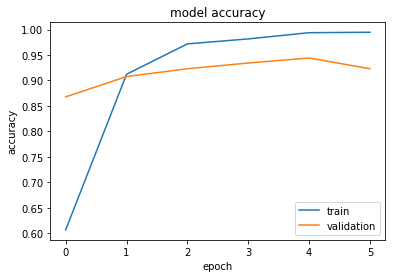

In [80]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'lower right')
plt.show()

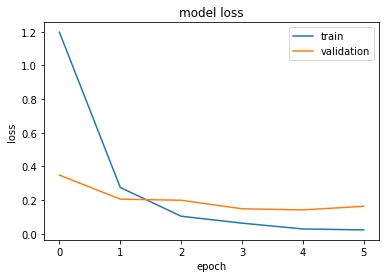

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.show()

### Aufgabe 5: Vorhersage auf Testdaten

- Definiere wieder einen `ImageDataGenerator` und benutze `flow_from_directory`, dieses Mal aber für die Testdaten im Ordner "Test", wie wir ihn oben definiert haben.

In [47]:
test_data_gen = ImageDataGenerator(
    rescale = 1 / 255
)

test_image_array_gen = test_data_gen.flow_from_directory(
    test_image_files_path,
    target_size = (img_width, img_height),
    class_mode = 'categorical',
    classes = fruit_list,
    color_mode = 'rgb', 
    batch_size = batch_size,
    shuffle = False,
    seed = 42)

Found 1459 images belonging to 10 classes.


- Definiere nun die Anzahl der Trainingsbilder.

In [43]:
test_samples = test_image_array_gen.n

- Bewerte die Vorhersage auf Testbildern.

In [48]:
model.evaluate_generator(test_image_array_gen,
                        steps = int(test_samples / batch_size))

[2.1081722802354316e-05, 1.0]

Der oben zu sehenden Output zeigt die Performance-Metriken Loss und Genauigkeit (`model.metrics_names`). 

Alternativ können wir auch ohne Kenntnisse der Klassen Vorhersagen auf Testdaten machen. Dafür definieren wir `flow_from_directory` wie folgt:

In [49]:
test_image_array_gen = test_data_gen.flow_from_directory(
    test_image_files_path,
    target_size = (img_width, img_height),
    class_mode = None,
    color_mode = 'rgb', 
    batch_size = batch_size,
    shuffle = False,
    seed = 42)

Found 2428 images belonging to 15 classes.


- Wende die Vorhersagefunktion aus Keras auf dem `ImageDataGenerator` an.

In [51]:
pred = model.predict_generator(test_image_array_gen,
                       steps = int(test_samples / batch_size))
predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices

array([4, 4, 4, ..., 3, 3, 3])

In [53]:
labels = (train_image_array_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [57]:
random.sample(predictions, 10)

['Kiwi',
 'Apricot',
 'Strawberry',
 'Orange',
 'Apricot',
 'Banana',
 'Plum',
 'Strawberry',
 'Orange',
 'Banana']